In [1]:
# import everything you need
import numpy as np
import scipy as sp
import pandas as pd
# activate inline magics
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpl_img
import seaborn as sns
# specific fo statistics
import pingouin as pg

Define neccesary parameters

In [2]:
data_file = "FED_fMRI_fullcodesfixed_final.xls"
covariate_file = "FED_Subject_Covariates.xls"

Create the neccessary factors and sort all variables appropriately

In [3]:
# extract - data from list in .xls file(s). Outliers and all known errors have already been corrected (see recent "ALLCODESFIXED")
# read relevant content
anova = pd.read_excel(data_file, sheet_name="Sheet1",
                      usecols = ['Subject', 'Condition', 'RT'])
covariates = pd.read_excel(covariate_file, sheet_name="analysis",
                           usecols = ['FED_ID', 'BDI_22_Score', 'Gender', 'Age', 'Race'])

# remove first six subjects
anova = anova[(anova.Subject.isin(range(7, 69)))]
covariates = covariates[(covariates.FED_ID.isin(range(7, 69)))]

# create variables cue_valence and cue_validity after Condition and assign values according to trial codings (neg, pos, neu) (valid, invalid)
neg, pos, neu = [1, 4, 7, 10], [2, 5, 8, 11], [3, 6, 9, 12]
valid, invalid = [val for val in range(7, 13)], [val for val in range(1, 7)]
# create list of group, valence and validity numerical indices
group_cats, valence_cats, validity_cats = ["dep", "con"], ["neg", "pos", "neu"], ["valid", "invalid"]
# copy Condition list and replace
anova['Cue_Valence'] = anova['Condition']
for valence, name in zip([neg, pos, neu], valence_cats):
    anova.loc[anova['Condition'].isin(valence), 'Cue_Valence'] = name

anova['Cue_Validity'] = anova['Condition']
for validity, name in zip([valid, invalid], validity_cats):
    anova.loc[anova['Condition'].isin(validity), 'Cue_Validity'] = name

# create variable DStatus after Subject and replace each subject value with the corresponding group identity
# separate covariate FED_IDs by BDI22
mdd = covariates.FED_ID[covariates['BDI_22_Score'] == 1]
control = covariates.FED_ID[covariates['BDI_22_Score'] == 0]
# copy Subject list and replace
anova['DStatus'] = anova['Subject']
anova.loc[anova['Subject'].isin(mdd), 'DStatus'] = group_cats[0]
anova.loc[anova['Subject'].isin(control), 'DStatus'] = group_cats[1]

# sort values by DStatus, valence and validity (by factor, starting with largest increment)
anova.sort_values(['DStatus', 'Cue_Valence', 'Cue_Validity'], inplace = True)

In [122]:
pd.set_option('display.max_rows', None)
print(anova)

            RT  Subject  Condition Cue_Valence Cue_Validity DStatus
1080    302.35        7          1         neg      invalid     con
1081    256.12        7          1         neg      invalid     con
1082    285.54        7          1         neg      invalid     con
1083    303.62        7          1         neg      invalid     con
1084    266.26        7          1         neg      invalid     con
1085    294.58        7          1         neg      invalid     con
1086    332.54        7          1         neg      invalid     con
1087   -490.68        7          1         neg      invalid     con
1088    281.30        7          1         neg      invalid     con
1099    577.72        7          1         neg      invalid     con
1100    296.54        7          1         neg      invalid     con
1101    360.85        7          1         neg      invalid     con
1102    321.91        7          1         neg      invalid     con
1103    321.38        7          1         neg  

In [35]:
# ANOVA above uses all raw RTs per subject across each UV level.
# Create RT means for smallest increment (validity) t get single values per subject (ANOVA error variance dofs)
# copy data to avoid accidents
anova_submeans = anova.copy().drop('Condition', axis=1)

# define list of subject numbers
fed_nums = [num for num in range(7, 69)]

# list RT by subject, valence and validity, respectively
for sub in anova_submeans['Subject'].unique():
    for valence in anova_submeans['Cue_Valence'].unique():
        for valid in anova_submeans['Cue_Validity'].unique():
            anova_submeans.loc[(anova_submeans['Subject'] == sub) & (anova_submeans['Cue_Valence'] == valence)
                                                                  & (anova_submeans['Cue_Validity'] == valid),
                               # replace the individual RT values with the mean by subject, valence and validity
                               'RT'] = anova_submeans["RT"][(anova_submeans['Subject'] == sub)
                                                          & (anova_submeans['Cue_Valence'] == valence)
                                                          & (anova_submeans['Cue_Validity'] == valid)].mean()

# drop duplicate lines from the dataframe
anova_submeans.drop_duplicates()

,RT,Subject,Cue_Valence,Cue_Validity,DStatus
1080,292.314483,7,neg,invalid,con
1260,324.400000,8,neg,invalid,con
1440,312.172759,9,neg,invalid,con
1620,331.795862,10,neg,invalid,con
1980,317.846207,12,neg,invalid,con
2160,339.091034,13,neg,invalid,con
2520,416.560000,15,neg,invalid,con
2700,276.969655,16,neg,invalid,con
2880,265.769310,17,neg,invalid,con
3240,327.416207,19,neg,invalid,con


In [33]:
pd.set_option('display.max_rows', None)
print(anova_submeans)

               RT  Subject  Condition Cue_Valence Cue_Validity DStatus
1080   292.314483        7          1         neg      invalid     con
1081   292.314483        7          1         neg      invalid     con
1082   292.314483        7          1         neg      invalid     con
1083   292.314483        7          1         neg      invalid     con
1084   292.314483        7          1         neg      invalid     con
1085   292.314483        7          1         neg      invalid     con
1086   292.314483        7          1         neg      invalid     con
1087   292.314483        7          1         neg      invalid     con
1088   292.314483        7          1         neg      invalid     con
1099   292.314483        7          1         neg      invalid     con
1100   292.314483        7          1         neg      invalid     con
1101   292.314483        7          1         neg      invalid     con
1102   292.314483        7          1         neg      invalid     con
1103  

In [36]:
# put both datasets into one list and compare the performance and outcome of the ANOVA testing
anovas = [anova, anova_submeans]

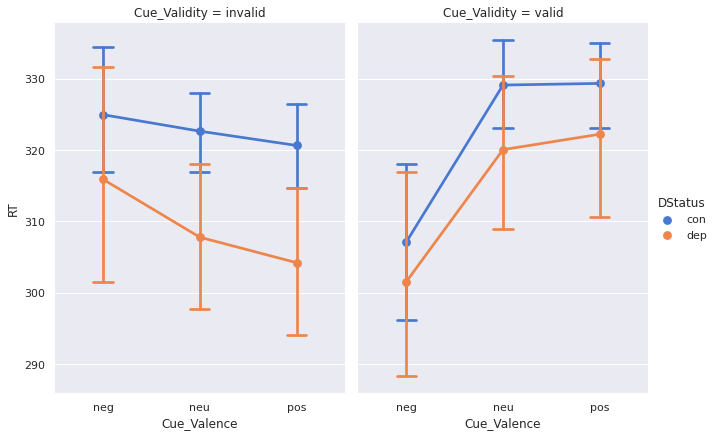

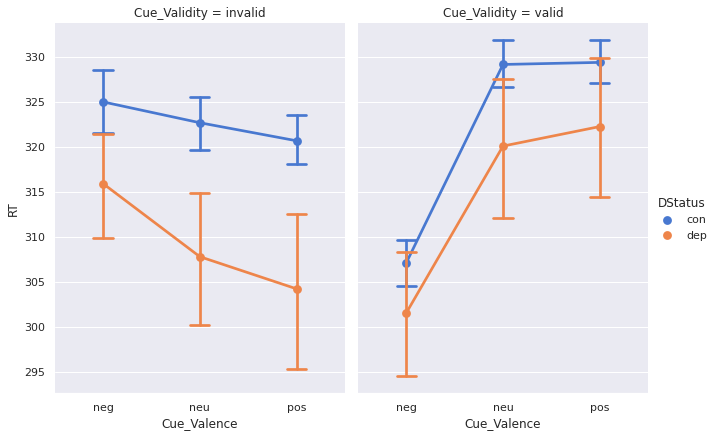

In [37]:
# set seaborn visual style
sns.set(style="darkgrid")
# Draw a pointplot to show pulse as a function of three categorical factors
for dataset in anovas:
    interact_plot = sns.catplot(x="Cue_Valence", y="RT", hue="DStatus", col="Cue_Validity",
                                capsize=.2, palette="muted", height=6, aspect=.75, kind="point", data=dataset)
    interact_plot.despine(left=True)
    # # save plot
    # interact_plot.savefig("RT_322_interact.png")

Build three-way ANOVA design and calculate the F-test

In [38]:
# check whether variances are equal using Levene tests
for dataset in anovas:
    homoscedast_DStatus = pg.homoscedasticity(data=anova, dv='RT', group='DStatus')
    homoscedast_Valence = pg.homoscedasticity(data=anova, dv='RT', group='Cue_Valence')
    homoscedast_Validity = pg.homoscedasticity(data=anova, dv='RT', group='Cue_Validity')
    # put all into list
    homoscedast = [homoscedast_DStatus, homoscedast_Valence, homoscedast_Validity]
    # inspect the results
    for test in homoscedast:
        print(test)

                W          pval  equal_var
levene  102.77696  4.767290e-24      False
                W          pval  equal_var
levene  15.035238  3.013443e-07      False
               W      pval  equal_var
levene  4.963112  0.025913      False
                W          pval  equal_var
levene  102.77696  4.767290e-24      False
                W          pval  equal_var
levene  15.035238  3.013443e-07      False
               W      pval  equal_var
levene  4.963112  0.025913      False


In [39]:
# run the full ANOVA
FED_anova = pg.anova(data=anova, dv='RT', between=['DStatus', 'Cue_Valence', 'Cue_Validity'], ss_type=3).round(3)  # round to three place digits
FED_meanRTs_anova = pg.anova(data=anova_submeans, dv='RT', between=['DStatus', 'Cue_Valence', 'Cue_Validity'], ss_type=3).round(3)  # round to three place digits

In [7]:
# main effect DStatus significant, Interaction Valence-Validity too, BUT neither of their main effects! -> simple effects!^^
# fix the error variance (residual variance  from full ANOVA)
err_MS = FED_anova.MS[FED_anova.Source == 'Residual'].values
err_dof = FED_anova.DF[FED_anova.Source == 'Residual'].values

# -> simple effects as two-way ANOVA only for valid trials
simpleeff_valid = pg.anova(data=anova[anova['Cue_Validity'] == "valid"], dv='RT', between=['DStatus', 'Cue_Valence'], ss_type=3).round(3)  # round to three place digits
# calculate corrected F value using the residual variance  from full ANOVA
vale_MS = simpleeff_valid.MS[simpleeff_valid.Source == 'Cue_Valence'].values
vale_dof = simpleeff_valid.DF[simpleeff_valid.Source == 'Cue_Valence'].values
correctF_valence = vale_MS / err_MS
correctp_valence = 1 - sp.stats.f.cdf(correctF_valence, vale_dof, err_dof)
# insert the correct value into dataframe
simpleeff_valid.insert(6, 'F_corr', [np.nan, *correctF_valence, np.nan, np.nan])  # lose the brackets^^
simpleeff_valid.insert(7, 'p_corr', [np.nan, *correctp_valence, np.nan, np.nan])  # lose the brackets^^

# -> simple effects as two-way ANOVA only for invalid trials
simpleeff_invalid = pg.anova(data=anova[anova['Cue_Validity'] == "invalid"], dv='RT', between=['DStatus', 'Cue_Valence'], ss_type=3).round(3)  # round to three place digits
# calculate corrected F value using the residual variance  from full ANOVA
vale_MS = simpleeff_invalid.MS[simpleeff_invalid.Source == 'Cue_Valence'].values
vale_dof = simpleeff_invalid.DF[simpleeff_invalid.Source == 'Cue_Valence'].values
correctF_valence = vale_MS / err_MS
correctp_valence = 1 - sp.stats.f.cdf(correctF_valence, vale_dof, err_dof)
# insert the correct value into dataframe
simpleeff_invalid.insert(6, 'F_corr', [np.nan, *correctF_valence, np.nan, np.nan])  # lose the brackets^^
simpleeff_invalid.insert(7, 'p_corr', [np.nan, *correctp_valence, np.nan, np.nan])  # lose the brackets^^

Plot three-way ANOVA results

In [40]:
FED_anova

,Source,SS,DF,MS,F,p-unc,np2
0,DStatus,2.989308e+05,1.0,298930.835,12.173,0.000,0.001
1,Cue_Valence,1.261261e+05,2.0,63063.037,2.568,0.077,0.000
2,Cue_Validity,1.356578e+04,1.0,13565.783,0.552,0.457,0.000
3,DStatus * Cue_Valence,1.276030e+04,2.0,6380.152,0.260,0.771,0.000
4,DStatus * Cue_Validity,2.688208e+04,1.0,26882.075,1.095,0.295,0.000
5,Cue_Valence * Cue_Validity,4.719226e+05,2.0,235961.279,9.608,0.000,0.002
6,DStatus * Cue_Valence * Cue_Validity,3.986043e+03,2.0,1993.021,0.081,0.922,0.000
7,Residual,2.737710e+08,11148.0,24557.861,NaN,NaN,NaN


In [41]:
FED_meanRTs_anova

,Source,SS,DF,MS,F,p-unc,np2
0,DStatus,2.989308e+05,1.0,298930.835,39.301,0.000,0.004
1,Cue_Valence,1.261261e+05,2.0,63063.037,8.291,0.000,0.001
2,Cue_Validity,1.356578e+04,1.0,13565.783,1.784,0.182,0.000
3,DStatus * Cue_Valence,1.276030e+04,2.0,6380.152,0.839,0.432,0.000
4,DStatus * Cue_Validity,2.688208e+04,1.0,26882.075,3.534,0.060,0.000
5,Cue_Valence * Cue_Validity,4.719226e+05,2.0,235961.279,31.022,0.000,0.006
6,DStatus * Cue_Valence * Cue_Validity,3.986043e+03,2.0,1993.021,0.262,0.769,0.000
7,Residual,8.479336e+07,11148.0,7606.150,NaN,NaN,NaN


In [130]:
simpleeff_valid

,Source,SS,DF,MS,F,p-unc,F_corr,p_corr,np2
0,DStatus,7.329054e+04,1,73290.544,2.872,0.090,NaN,NaN,0.001
1,Cue_Valence,5.413986e+05,2,270699.289,10.609,0.000,11.022918,0.000017,0.004
2,DStatus * Cue_Valence,2.846830e+03,2,1423.415,0.056,0.946,NaN,NaN,0.000
3,Residual,1.422220e+08,5574,25515.243,NaN,NaN,NaN,NaN,NaN


In [131]:
simpleeff_invalid

,Source,SS,DF,MS,F,p-unc,F_corr,p_corr,np2
0,DStatus,2.524560e+05,1.0,252455.959,10.697,0.001,NaN,NaN,0.002
1,Cue_Valence,6.087552e+04,2.0,30437.761,1.290,0.275,1.23943,0.289589,0.000
2,DStatus * Cue_Valence,1.383800e+04,2.0,6918.998,0.293,0.746,NaN,NaN,0.000
3,Residual,1.315491e+08,5574.0,23600.479,NaN,NaN,NaN,NaN,NaN


In [8]:
# full list of table plotting formats in pingouin:
# "plain" "simple" "github""grid" "fancy_grid" "pipe""orgtbl" "jira""presto" "pretty""psql" "rst" "mediawiki" "moinmoin" "youtrack" "html" "unsafehtml" "latex"
# "latex_raw" "latex_booktabs" "latex_longtable" "textile""tsv"
pg.print_table(FED_anova, tablefmt="latex")
pg.print_table(simpleeff_valid, tablefmt="latex")
pg.print_table(simpleeff_invalid, tablefmt="latex")


ANOVA SUMMARY

\begin{tabular}{lrrrrrr}
\hline
 Source                               &            SS &        DF &         MS &       F &   p-unc &     np2 \\
\hline
 DStatus                              &    298930.835 &     1.000 & 298930.835 &  12.173 &   0.000 &   0.001 \\
 Cue\_Valence                          &    126126.075 &     2.000 &  63063.037 &   2.568 &   0.077 &   0.000 \\
 Cue\_Validity                         &     13565.783 &     1.000 &  13565.783 &   0.552 &   0.457 &   0.000 \\
 DStatus * Cue\_Valence                &     12760.303 &     2.000 &   6380.152 &   0.260 &   0.771 &   0.000 \\
 DStatus * Cue\_Validity               &     26882.075 &     1.000 &  26882.075 &   1.095 &   0.295 &   0.000 \\
 Cue\_Valence * Cue\_Validity           &    471922.558 &     2.000 & 235961.279 &   9.608 &   0.000 &   0.002 \\
 DStatus * Cue\_Valence * Cue\_Validity &      3986.043 &     2.000 &   1993.021 &   0.081 &   0.922 &   0.000 \\
 Residual                             & 2

Calculate Enhanced cue Validity (ECV), Attentional Engagement (AE), and Difficulty in Attentional Disengagement (DAD) - subject means

In [9]:
# create RT means for smallest increment (validity)
# copy data to avoid accidents
eect_ttest = anova.copy()

# define list of subject numbers
fed_nums = [num for num in range(7, 69)]

# sort data by subject, valence and validity
eect_ttest.sort_values(['Subject', 'Cue_Valence', 'Cue_Validity'], inplace = True)

# list RT by subject, valence and validity, respectively
rts = {}
for sub in eect_ttest['Subject'].unique():
    for valence in eect_ttest['Cue_Valence'].unique():
        for valid in eect_ttest['Cue_Validity'].unique():
            rts[f"{sub}_{valence}_{valid}"] = eect_ttest.loc[(eect_ttest['Subject'] == sub)
                                                           & (eect_ttest['Cue_Valence'] == valence) 
                                                           & (eect_ttest['Cue_Validity'] == valid), 'RT'].tolist()

In [10]:
# calculate ECV for each valence per subject
mean_ecv = {}
# start at subject index level
for sub in fed_nums:
    # iterate across valences
    for val in valence_cats:
        # create list for validity-referenced combos
        validity = []
        # go through combinations of conditions by subject
        for combo in rts.keys():
            # fix the subject ID
            if (int(combo.split('_', 1)[0]) == sub and combo.split('_', 2)[1]) == val:
                # collect validities
                validity.append(combo)
        #print(validity)
        # calculate the mean of the inv-v difference by valence
        mean_ecv[f"{sub}_{val}"] = np.mean([inv - v for inv, v in zip(rts[validity[0]], rts[validity[1]])])

# transfer to pd.dataframe
mean_ecv = (pd.DataFrame.from_dict(mean_ecv, orient='index', columns=['mean_ECV']).rename_axis('FEDbycondition').reset_index())

In [11]:
# calculate AE for each valence per subject
mean_ae = {}
# start at subject index level
for sub in fed_nums:
    # iterate across valences
    ref = valence_cats[-1]  # neutral is always reference
    for val in valence_cats[:-1]:
        # go through combinations of conditions by subject
        for combo in rts.keys():
            # set valid neutral reference
            reference = f"{sub}_{ref}_valid"
            # fix the subject ID, and validity to valid
            if (int(combo.split('_', 1)[0]) == sub and combo.split('_', 2)[1] == val and combo.rsplit('_', 1)[1]) == "valid":
                # print(reference, combo)
                # calculate the mean of the vneu-vemo difference by valence
                mean_ae[f"{sub}_{val}"] = np.mean([vneu - vemo for vneu, vemo in zip(rts[reference], rts[combo])])

# transfer to pd.dataframe
mean_ae = (pd.DataFrame.from_dict(mean_ae, orient='index', columns=['mean_AE']).rename_axis('FEDbycondition').reset_index())

In [12]:
# calculate DAD for each valence per subject
mean_dad = {}
# start at subject index level
for sub in fed_nums:
    # iterate across valences
    ref = valence_cats[-1]  # neutral is always reference
    for val in valence_cats[:-1]:
        # go through combinations of conditions by subject
        for combo in rts.keys():
            # set invalid neutral reference
            reference = f"{sub}_{ref}_invalid"
            # fix the subject ID, and validity to invalid
            if (int(combo.split('_', 1)[0]) == sub and combo.split('_', 2)[1] == val and combo.rsplit('_', 1)[1]) == "invalid":
                # print(reference, combo)
                # calculate the mean of the invemo-invneu difference by valence
                mean_dad[f"{sub}_{val}"] = np.mean([invemo - invneu for invemo, invneu in zip(rts[combo], rts[reference])])

# transfer to pd.dataframe
mean_dad = (pd.DataFrame.from_dict(mean_dad, orient='index', columns=['mean_DAD']).rename_axis('FEDbycondition').reset_index())

In [13]:
# add group column to each variable's dataframe
for frame in [mean_ecv, mean_ae, mean_dad]:
    # copy Subject, Condition lists and transform to integers
    frame['FED'] = frame['FEDbycondition'].apply(lambda x: x.split('_', 1)[0])
    frame['Valence'] = frame['FEDbycondition'].apply(lambda x: x.split('_', 1)[1])
    # copy FED again to obtain DStatus list
    frame['DStatus'] = frame['FED']
    # check and change by group
    frame.loc[frame['FED'].astype(int).isin(mdd), 'DStatus'] = "dep"
    frame.loc[frame['FED'].astype(int).isin(control), 'DStatus'] = "con"
    # finally, sort the dataframe by DStatus and FED
    frame.sort_values(['DStatus', 'Valence', 'FED'], inplace = True)
#     # drop FEDbyCondition
#     frame.drop(columns='FEDbycondition', inplace=True)

Inspect and make sure that all variables look OK

In [14]:
mean_ecv

,FEDbycondition,mean_ECV,FED,Valence,DStatus
9,10_neg,34.369655,10,neg,con
15,12_neg,35.432069,12,neg,con
18,13_neg,53.188966,13,neg,con
24,15_neg,54.702759,15,neg,con
27,16_neg,9.548276,16,neg,con
...,...,...,...,...,...
136,52_pos,-30.002667,52,pos,dep
145,55_pos,-45.319333,55,pos,dep
151,57_pos,-17.330000,57,pos,dep
157,59_pos,-65.515000,59,pos,dep


In [15]:
mean_ae

,FEDbycondition,mean_AE,FED,Valence,DStatus
6,10_neg,33.252000,10,neg,con
10,12_neg,31.385000,12,neg,con
12,13_neg,44.294667,13,neg,con
16,15_neg,18.425333,15,neg,con
18,16_neg,44.665000,16,neg,con
...,...,...,...,...,...
91,52_pos,-6.875667,52,pos,dep
97,55_pos,-1.901000,55,pos,dep
101,57_pos,-20.750000,57,pos,dep
105,59_pos,-33.893000,59,pos,dep


In [16]:
mean_dad

,FEDbycondition,mean_DAD,FED,Valence,DStatus
6,10_neg,19.434138,10,neg,con
10,12_neg,12.925862,12,neg,con
12,13_neg,-15.084138,13,neg,con
16,15_neg,-0.735862,15,neg,con
18,16_neg,1.514828,16,neg,con
...,...,...,...,...,...
91,52_pos,36.020333,52,pos,dep
97,55_pos,3.432333,55,pos,dep
101,57_pos,20.808667,57,pos,dep
105,59_pos,-34.291333,59,pos,dep


Calculate two-sided t-tests (un)like Koster (2005)

In [17]:
# calculate cauchy scaling factor of Koster et al. (2005)
# - original: https://doi.org/10.3758/PBR.16.2.225; recent implimentation: https://doi.org/10.1080/00031305.2018.1562983

# transfer t_vals to cohens d for basing on propability density function
smallest_t = 2.15
largest_t = 2.72
small_cohen = pg.compute_effsize_from_t(smallest_t, nx=20, ny=20, eftype='cohen')
large_cohen = pg.compute_effsize_from_t(largest_t, N=15, eftype='cohen')
# spectrum based on Exp1 & Exp2 results
# t-values are between 0 and 1.4, round up
value_halfwidth = 2
# set scaling factor required for estimated 80% probability that the true effect sizes lie within the spectrum (+2 - -2)
cauchy_r = 0.707
# control the probability
effect_prob_est = sp.stats.cauchy.cdf(value_halfwidth, 0, cauchy_r) - sp.stats.cauchy.cdf(-value_halfwidth, 0, cauchy_r)

In [18]:
# run a two-sided t-test with appropriate p-level threshold (unlike Koster ...)
# for ECV
# neg
ecvneg_mdd = mean_ecv['mean_ECV'][(mean_ecv['Valence'] == "neg") & (mean_ecv['DStatus'] == "dep")].tolist()
ecvneg_con = mean_ecv['mean_ECV'][(mean_ecv['Valence'] == "neg") & (mean_ecv['DStatus'] == "con")].tolist()
# pos
ecvpos_mdd = mean_ecv['mean_ECV'][(mean_ecv['Valence'] == "pos") & (mean_ecv['DStatus'] == "dep")].tolist()
ecvpos_con = mean_ecv['mean_ECV'][(mean_ecv['Valence'] == "pos") & (mean_ecv['DStatus'] == "con")].tolist()
# neu
ecvneu_mdd = mean_ecv['mean_ECV'][(mean_ecv['Valence'] == "neu") & (mean_ecv['DStatus'] == "dep")].tolist()
ecvneu_con = mean_ecv['mean_ECV'][(mean_ecv['Valence'] == "neu") & (mean_ecv['DStatus'] == "con")].tolist()
# put all into tupled list
ecv_testbtw = [(ecvneg_mdd, ecvneg_con), (ecvpos_mdd, ecvpos_con), (ecvneu_mdd, ecvneu_con)]
ecv_testwithin = [[group[0] for group in ecv_testbtw], [group[1] for group in ecv_testbtw]]

# test all valences separately between and within group
# build empty list to hold all tests
ttests_ecv_all = []
# first compare valences between groups with a 2-sample t-test
for valence in ecv_testbtw:
    ttests_ecv = pg.ttest(valence[0], valence[1], paired=False, tail='two-sided', r=cauchy_r, confidence=0.95)
    # add condition ID
    ttests_ecv.insert(0, "ConditionID", f"ecv_btw_{valence_cats[ecv_testbtw.index(valence)]}")
    # add (partial) eta-squared estimate to the dataframe
    ttests_ecv.insert(7, "eta-squared", pg.compute_effsize(valence[0], valence[1], paired=False, eftype='eta-square'))
    # put the finish dataframe into list
    ttests_ecv_all.append(ttests_ecv)

# Now look at the valences within groups with a paired t-test
for group in ecv_testwithin:
    # compare neg and pos against neu
    for valence in [0, 1]:
        ttests_ecv = pg.ttest(group[valence], group[2], paired=True, tail='two-sided', r=cauchy_r, confidence=0.95)
        # add condition and group ID (0 means control^^)
        ttests_ecv.insert(0, "ConditionID", f"ecv_within_{group_cats[ecv_testwithin.index(group)]}_{valence_cats[[0, 1].index(valence)]}")
        # add (partial) eta-squared estimate to the dataframe
        ttests_ecv.insert(7, "eta-squared", pg.compute_effsize(group[valence], group[2], paired=True, eftype='eta-square'))
        # put the finish dataframe into list
        ttests_ecv_all.append(ttests_ecv)

# concat list to dataframe
ttests_ecv_all = pd.concat(ttests_ecv_all)

In [19]:
# test whether or not all t-test RT lists have the same length
for group in ecv_testwithin:
    print(f"Negative ECV {len(group[0])}; Positive ECV {len(group[1])}; Neutral ECV {len(group[2])}")

Negative ECV 31; Positive ECV 31; Neutral ECV 31
Negative ECV 31; Positive ECV 31; Neutral ECV 31


In [20]:
# run a two-sided t-test with appropriate p-level threshold (unlike Koster ...)
# for AE
# neg
aeneg_mdd = mean_ae['mean_AE'][(mean_ae['Valence'] == "neg") & (mean_ae['DStatus'] == "dep")].tolist()
aeneg_con = mean_ae['mean_AE'][(mean_ae['Valence'] == "neg") & (mean_ae['DStatus'] == "con")].tolist()
# pos
aepos_mdd = mean_ae['mean_AE'][(mean_ae['Valence'] == "pos") & (mean_ae['DStatus'] == "dep")].tolist()
aepos_con = mean_ae['mean_AE'][(mean_ae['Valence'] == "pos") & (mean_ae['DStatus'] == "con")].tolist()
# put all into tupled list (no within comparisons here)
ae_testbtw = [(aeneg_mdd, aeneg_con), (aepos_mdd, aepos_con)]

# test all valences separately between and within group
# build empty list to hold all tests
ttests_ae_all = []
# first compare valences between groups with a 2-sample t-test
for valence in ae_testbtw:
    ttests_ae = pg.ttest(valence[0], valence[1], paired=False, tail='two-sided', r=cauchy_r, confidence=0.95)
    # add condition ID
    ttests_ae.insert(0, "ConditionID", f"ae_btw_{valence_cats[ae_testbtw.index(valence)]}")
    # add (partial) eta-squared estimate to the dataframe
    ttests_ae.insert(7, "eta-squared", pg.compute_effsize(valence[0], valence[1], paired=False, eftype='eta-square'))
    # put the finish dataframe into list
    ttests_ae_all.append(ttests_ae)

# concat list to dataframe
ttests_ae_all = pd.concat(ttests_ae_all)

In [21]:
# run a two-sided t-test with appropriate p-level threshold (unlike Koster ...)
# for DAD
# neg
dadneg_mdd = mean_dad['mean_DAD'][(mean_dad['Valence'] == "neg") & (mean_dad['DStatus'] == "dep")].tolist()
dadneg_con = mean_dad['mean_DAD'][(mean_dad['Valence'] == "neg") & (mean_dad['DStatus'] == "con")].tolist()
# pos
dadpos_mdd = mean_dad['mean_DAD'][(mean_dad['Valence'] == "pos") & (mean_dad['DStatus'] == "dep")].tolist()
dadpos_con = mean_dad['mean_DAD'][(mean_dad['Valence'] == "pos") & (mean_dad['DStatus'] == "con")].tolist()
# put all into tupled list (no within comparisons here)
dad_testbtw = [(dadneg_mdd, dadneg_con), (dadpos_mdd, dadpos_con)]

# test all valences separately between and within group
# build empty list to hold all tests
ttests_dad_all = []
# first compare valences between groups with a 2-sample t-test
for valence in dad_testbtw:
    ttests_dad = pg.ttest(valence[0], valence[1], paired=False, tail='two-sided', r=cauchy_r, confidence=0.95)
    # add condition ID
    ttests_dad.insert(0, "ConditionID", f"dad_btw_{valence_cats[dad_testbtw.index(valence)]}")
    # add (partial) eta-squared estimate to the dataframe
    ttests_dad.insert(7, "eta-squared", pg.compute_effsize(valence[0], valence[1], paired=False, eftype='eta-square'))
    # put the finish dataframe into list
    ttests_dad_all.append(ttests_dad)

# concat list to dataframe
ttests_dad_all = pd.concat(ttests_dad_all)

Plot t-test results

In [22]:
# view respective ttest dicts to make sure everything looks as it should
ttests_ecv_all

,ConditionID,T,dof,tail,p-val,CI95%,cohen-d,eta-squared,BF10,power
T-test,ecv_btw_neg,-0.190681,60,two-sided,0.849419,"[-24.24, 20.02]",0.048433,0.000586,0.263,0.054043
T-test,ecv_btw_pos,-1.097178,60,two-sided,0.276948,"[-24.21, 7.06]",0.278683,0.019046,0.43,0.190535
T-test,ecv_btw_neu,-0.776735,60,two-sided,0.440366,"[-20.77, 9.15]",0.197291,0.009637,0.334,0.119147
T-test,ecv_within_dep_neg,2.901146,30,two-sided,0.006900,"[8.13, 46.78]",0.620390,0.087775,6.109,0.916467
T-test,ecv_within_dep_pos,-0.801471,30,two-sided,0.429162,"[-18.97, 8.28]",0.154526,0.005934,0.257,0.132504
T-test,ecv_within_con_neg,4.100952,30,two-sided,0.000289,"[11.92, 35.58]",0.836257,0.148814,99.117,0.994498
T-test,ecv_within_con_pos,-0.601208,30,two-sided,0.552218,"[-11.35, 6.19]",0.103956,0.002694,0.226,0.086694


In [23]:
ttests_ae_all

,ConditionID,T,dof,tail,p-val,CI95%,cohen-d,eta-squared,BF10,power
T-test,ae_btw_neg,-0.467297,60,two-sided,0.641980,"[-18.44, 11.46]",0.118694,0.003510,0.284,0.074558
T-test,ae_btw_pos,-0.429936,60,two-sided,0.668782,"[-10.93, 7.06]",0.109204,0.002973,0.28,0.070747


In [24]:
ttests_dad_all

,ConditionID,T,dof,tail,p-val,CI95%,cohen-d,eta-squared,BF10,power
T-test,dad_btw_neg,0.498991,60,two-sided,0.619610,"[-14.67, 24.42]",0.126744,0.004000,0.288,0.078051
T-test,dad_btw_pos,-0.110757,60,two-sided,0.912178,"[-15.81, 14.15]",0.028132,0.000198,0.26,0.051362


In [25]:
# full list of table plotting formats in pingouin:
# "plain" "simple" "github""grid" "fancy_grid" "pipe""orgtbl" "jira""presto" "pretty""psql" "rst" "mediawiki" "moinmoin" "youtrack" "html" "unsafehtml" "latex"
# "latex_raw" "latex_booktabs" "latex_longtable" "textile""tsv"
pg.print_table(ttests_ecv_all, tablefmt="latex")
pg.print_table(ttests_ae_all, tablefmt="latex")
pg.print_table(ttests_dad_all, tablefmt="latex")

\begin{tabular}{lrrlrlrrrr}
\hline
 ConditionID        &      T &   dof & tail      &   p-val & CI95\%           &   cohen-d &   eta-squared &   BF10 &   power \\
\hline
 ecv\_btw\_neg        & -0.191 &    60 & two-sided &   0.849 & [-24.24  20.02] &     0.048 &         0.001 &  0.263 &   0.054 \\
 ecv\_btw\_pos        & -1.097 &    60 & two-sided &   0.277 & [-24.21   7.06] &     0.279 &         0.019 &  0.430 &   0.191 \\
 ecv\_btw\_neu        & -0.777 &    60 & two-sided &   0.440 & [-20.77   9.15] &     0.197 &         0.010 &  0.334 &   0.119 \\
 ecv\_within\_dep\_neg &  2.901 &    30 & two-sided &   0.007 & [ 8.13 46.78]   &     0.620 &         0.088 &  6.109 &   0.916 \\
 ecv\_within\_dep\_pos & -0.801 &    30 & two-sided &   0.429 & [-18.97   8.28] &     0.155 &         0.006 &  0.257 &   0.133 \\
 ecv\_within\_con\_neg &  4.101 &    30 & two-sided &   0.000 & [11.92 35.58]   &     0.836 &         0.149 & 99.117 &   0.994 \\
 ecv\_within\_con\_pos & -0.601 &    30 & two-sided &

Calculate Enhanced cue Validity (ECV), Attentional Engagement (AE), and Difficulty in Attentional Disengagement (DAD) - group means

In [26]:
# create mean_{variable} by valence for each group
# collect all single values in a dict for extraction into table
Group_vars_decript = {"MDD_mean": {}, "MDD_std": {}, "CON_mean": {}, "CON_std": {}}

for frame in [("mean_ECV", mean_ecv), ("mean_AE", mean_ae), ("mean_DAD", mean_dad)]:
    # locate Valence and DStatus in frame and set group column to mean_ECV across FEDs for those parameters
    for valence in valence_cats:
        # for MDD
        Group_vars_decript["MDD_mean"][f"{frame[0].split('_', 1)[1]}_{valence}"] = frame[1][frame[0]][(frame[1]['DStatus'] == "dep") & (frame[1]['Valence'] == valence)].mean()
        Group_vars_decript["MDD_std"][f"{frame[0].split('_', 1)[1]}_{valence}"] = frame[1][frame[0]][(frame[1]['DStatus'] == "dep") & (frame[1]['Valence'] == valence)].std()
        # for control
        Group_vars_decript["CON_mean"][f"{frame[0].split('_', 1)[1]}_{valence}"] = frame[1][frame[0]][(frame[1]['DStatus'] == "con") & (frame[1]['Valence'] == valence)].mean()
        Group_vars_decript["CON_std"][f"{frame[0].split('_', 1)[1]}_{valence}"] = frame[1][frame[0]][(frame[1]['DStatus'] == "con") & (frame[1]['Valence'] == valence)].std()

# drop all items with nan values (neutral valences for AE, DAD)
for group in Group_vars_decript.keys():
    for item in list(Group_vars_decript[group].items()):
        if item[1] is np.NaN:
            Group_vars_decript[group].pop(item[0])

# transfer dict to pd.dataframe
Group_vars_decript = pd.DataFrame.from_dict(Group_vars_decript, orient='columns')
# make index its own column
Group_vars_decript.insert(0, "Var_Valence", Group_vars_decript.index)

Build summary tables for each variable by group, valence (and validity, if needed)

In [27]:
print(Group_vars_decript)

        Var_Valence   MDD_mean    MDD_std   CON_mean    CON_std
ECV_neg     ECV_neg  15.178287  53.195542  17.288320  31.084200
ECV_pos     ECV_pos -17.622538  36.144506  -9.048720  24.219795
ECV_neu     ECV_neu -12.276753  32.972100  -6.466333  25.447304
AE_neg       AE_neg  18.524548  31.432013  22.017032  27.269306
AE_pos       AE_pos  -2.164419  17.974284  -0.230452  17.441070
DAD_neg     DAD_neg   7.641390  48.165773   2.765273  25.303751
DAD_pos     DAD_pos  -3.181366  35.235288  -2.351935  22.292987


In [186]:
# full list of table plotting formats in pingouin:
# "plain" "simple" "github""grid" "fancy_grid" "pipe""orgtbl" "jira""presto" "pretty""psql" "rst" "mediawiki" "moinmoin" "youtrack" "html" "unsafehtml" "latex"
# "latex_raw" "latex_booktabs" "latex_longtable" "textile""tsv"
pg.print_table(Group_vars_decript, tablefmt="latex")

\begin{tabular}{lrrrr}
\hline
 Var\_Valence   &   MDD\_mean &   MDD\_std &   CON\_mean &   CON\_std \\
\hline
 ECV\_neg       &     15.178 &    53.196 &     17.288 &    31.084 \\
 ECV\_pos       &    -17.623 &    36.145 &     -9.049 &    24.220 \\
 ECV\_neu       &    -12.277 &    32.972 &     -6.466 &    25.447 \\
 AE\_neg        &     18.525 &    31.432 &     22.017 &    27.269 \\
 AE\_pos        &     -2.164 &    17.974 &     -0.230 &    17.441 \\
 DAD\_neg       &      7.641 &    48.166 &      2.765 &    25.304 \\
 DAD\_pos       &     -3.181 &    35.235 &     -2.352 &    22.293 \\
\hline
\end{tabular}



# Testing Zone

In [ ]:


# # transfer to pd.dataframe
# rts_pd = (pd.DataFrame.from_dict(rts, orient='index', columns=['mean_RT']).rename_axis('condition').reset_index())